In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [18]:
def generate_time_series(
    t0="2020-01-01 00:00:00"
):
    time = np.arange(50)
    values = np.where(time < 20, time**2, 
                      (time-5)**2)

    base = []
    for iteration in range(10):
        for y in range(50):
            base.append(values[y])
            
    base += np.random.randn(500)*100
    
    freq = "H"
    data_length = len(base)
    index = pd.date_range(start=t0, 
                          freq=freq, 
                          periods=data_length)
    ts = pd.Series(data=base, index=index)
    
    return {
        "freq": freq,
        "t0": t0,
        "length": len(ts),
        "data": ts
    }

In [19]:
time_series_data = generate_time_series()
time_series_data

{'freq': 'H',
 't0': '2020-01-01 00:00:00',
 'length': 500,
 'data': 2020-01-01 00:00:00    -118.520821
 2020-01-01 01:00:00    -121.417558
 2020-01-01 02:00:00    -113.624594
 2020-01-01 03:00:00    -197.074225
 2020-01-01 04:00:00      11.191463
                           ...     
 2020-01-21 15:00:00    1732.537542
 2020-01-21 16:00:00    1675.656558
 2020-01-21 17:00:00    1684.402002
 2020-01-21 18:00:00    1844.359636
 2020-01-21 19:00:00    2092.252685
 Freq: H, Length: 500, dtype: float64}

Text(0, 0.5, 'VALUE')

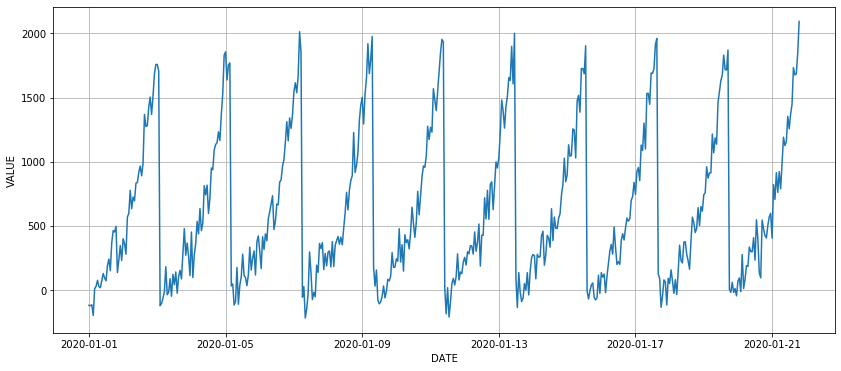

In [20]:
data = time_series_data["data"]
time = data.index
values = data

plt.figure(figsize=(14,6))
plt.plot(time, values)
plt.grid(True)
plt.xlabel("DATE")
plt.ylabel("VALUE")

In [21]:
!mkdir -p tmp

In [22]:
import json

def save_data_to_json(time_series_data, 
                      filename):
    tmp = {}

    tmp["freq"] = time_series_data["freq"]
    tmp["t0"] = time_series_data["t0"]
    tmp["length"] = time_series_data["length"]
    tmp["data"] = list(time_series_data["data"])
    
    with open(filename, 'w') as file:
        json.dump(tmp, file)

In [23]:
save_data_to_json(time_series_data, 
                  "tmp/all.json")

In [24]:
!head tmp/all.json

{"freq": "H", "t0": "2020-01-01 00:00:00", "length": 500, "data": [-118.52082060067684, -121.4175575551188, -113.62459432605203, -197.07422525358263, 11.191462904161721, 29.736005749623345, 76.24486604755742, 27.736000398893164, 18.848302861216744, 74.35698555341803, 129.43327295181004, 94.57009100792779, 72.3348002974416, 191.49188900648832, 241.77476622998327, 151.61038580421513, 368.57323644034955, 463.07220330967186, 452.76943649864734, 496.8596754707588, 137.119659729258, 235.45660289058011, 347.32993934978765, 230.94355499633014, 400.39680887729725, 362.6708489975951, 279.8031994561626, 569.1736855202247, 597.2351937381563, 776.9566278787247, 633.3240728695606, 724.8999069748967, 695.1055239344122, 832.3916629027741, 836.5742125904031, 918.0182569741863, 966.5558358899701, 890.7053052359212, 988.1336175250193, 1368.507116793928, 1273.820557924451, 1280.916342030059, 1425.7230963084992, 1503.370094378147, 1368.1951206761848, 1508.1987075347613, 1681.7662335089863, 1757.38967214779